# 🏔️ 🧩 Complete Guide to Statistical Testing A to Z

Welcome to this comprehensive guide on statistical testing, designed to equip you with everything you need to know from basic concepts to advanced applications in data science. Whether you're a budding data scientist or a seasoned professional looking to refine your statistical analysis skills, this notebook is tailored for you!

## What Will You Learn?

In this guide, we will explore a variety of statistical tests, each serving a unique purpose in data analysis, ensuring you have the tools to confidently tackle any data-driven challenge. Here's what we'll cover:

- **Chi-Square Test:** Understand how to test relationships between categorical variables.
- **Two-Sample T-Test & Paired T-Test:** Learn to compare means from different groups to decipher statistical significance in their differences.
- **ANOVA (Analysis of Variance):** Dive into testing differences across multiple groups simultaneously.
- **Test of Correlation:** Discover the relationships and associations between continuous variables.
- **Non-Parametric Tests:** Gain insights into methods that do not assume a specific data distribution, ideal for non-normal datasets.
- **A/B Testing (Continuous & Boolean Outcomes):** Master the art of comparing two versions of a variable to determine the better performing one in both continuous and binary outcomes.

## Why This Guide?

- **Step-by-Step Tutorials:** Each section includes clear explanations followed by practical examples, ensuring you not only learn but also apply your knowledge.
- **Interactive Learning:** Engage with interactive code cells that allow you to see the effects of statistical tests in real-time.

### How to Use This Notebook

- **Run the Cells:** Follow along with the code examples by running the cells yourself. Modify the parameters to see how the results change.
- **Explore Further:** After completing the guided sections, try applying the tests to your own datasets to reinforce your learning.

Prepare to unlock the full potential of statistical testing in data science. Let's dive in and transform data into decisions!


# Dataset Description

The dataset used in this notebook is `Sales_and_Satisfaction_V1.3.csv`. It contains information on sales and customer satisfaction before and after an intervention, along with purchase behavior. Below is a detailed description of each column, including the data types and a brief explanation.

### Columns:

1. **Group** (object)
   - Indicates whether the entry is part of the control or treatment group.
   - Example values: `Control`, `Treatment`
   

2. **Customer_Segment** (object)
   - Segments customers into different value groups.
   - Example values: `High Value`, `Medium Value`
   

3. **Sales_Before** (float64)
   - Sales amount before the intervention.
   - Example values: `216.21`, `225.09`
   

4. **Sales_After** (float64)
   - Sales amount after the intervention.
   - Example values: `246.87`, `257.57`
   

5. **Customer_Satisfaction_Before** (float64)
   - Customer satisfaction score before the intervention.
   - Example values: `58.93`, `84.71`
   

6. **Customer_Satisfaction_After** (float64)
   - Customer satisfaction score after the intervention.
   - Example values: `61.60`, `83.84`
   

7. **Purchase_Made** (object)
   - Indicates whether a purchase was made.
   - Example values: `Yes`, `No`
   

### Dataset Overview:

- **Total Entries:** 10,000



# Chi-Square Test

The Chi-Square Test determines whether there is a significant association between two categorical variables, widely used in fields like sociology, biology, and market research.

## What is the Chi-Square Test?

This non-parametric test assesses whether observed frequency distributions align with expected distributions under the null hypothesis.

### Types of Chi-Square Tests

1. **Chi-Square Test for Independence**: Evaluates if two categorical variables are independent.
2. **Chi-Square Goodness of Fit Test**: Determines if sample data matches a specific population distribution.

## When to Use the Chi-Square Test

- Variables are categorical.
- Sample data is randomly drawn.
- Expected frequency for each cell is at least 5.

## Hypotheses for Chi-Square Test for Independence

- **Null Hypothesis (H0)**: No association between the categorical variables (independent).
- **Alternative Hypothesis (H1)**: An association exists between the categorical variables (not independent).

## Assumptions

1. Data should be randomly sampled.
2. Each expected frequency should be at least 5. If not, consider combining categories or using Fisher's Exact Test for small sample sizes.

## Step-by-Step Guide

1. **Create a Contingency Table**: Displays the frequency distribution of variables.
2. **Calculate the Chi-Square Statistic**:

   $$
   \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
   $$
   
   where \( O_i \) is the observed frequency and \( E_i \) is the expected frequency.
3. **Determine the p-value**: Compare the Chi-Square statistic to a Chi-Square distribution with degrees of freedom:

   $$
   df = (r-1) \times (c-1)
   $$
   
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Odds Ratio

The odds ratio is a measure of association between two categorical variables, representing the odds that an outcome will occur given a particular exposure, compared to the odds of the outcome occurring without that exposure.

### Calculating the Odds Ratio

For a 2x2 contingency table:
$$
\text{Odds Ratio} = \frac{(a/c)}{(b/d)} = \frac{a \cdot d}{b \cdot c}
$$
where:
- \(a\) and \(b\) are the frequencies in the exposed group.
- \(c\) and \(d\) are the frequencies in the non-exposed group.

Note: The odds ratio is only applicable for 2x2 tables. Although our example might not meet this condition, we include the calculation for teaching purposes.

## Example: Chi-Square Test for Independence

Using `Group` and `Customer_Segment` variables:

- **Null Hypothesis (H0)**: No association between `Group` and `Customer_Segment`.
- **Alternative Hypothesis (H1)**: An association exists between `Group` and `Customer_Segment`.

### Steps

1. **Create a Contingency Table**: Summarize the data.
2. **Calculate the Chi-Square Statistic**: Use observed and expected frequencies.
3. **Determine the p-value**: Compare the statistic to the Chi-Square distribution.
4. **Interpret the Results**: Based on the p-value.

### Interpretation

- **Chi-Square Statistic**: Measures the discrepancy between observed and expected frequencies.
- **p-value**: Probability of observing the test results under the null hypothesis.
- **Degrees of Freedom**: Calculated as (rows - 1) * (columns - 1).

If the p-value is < 0.05, reject the null hypothesis, indicating a significant association. Otherwise, fail to reject the null hypothesis.

### Odds Ratio Interpretation

- **Odds Ratio > 1**: Positive association between variables.
- **Odds Ratio = 1**: No association.
- **Odds Ratio < 1**: Negative association.

## Fisher's Exact Test

Fisher's Exact Test is an alternative to the Chi-Square Test when the sample size is small, or the expected frequency assumption is not met. Though we meet the conditions for the Chi-Square Test in this example, we'll demonstrate Fisher's Exact Test for practice purposes. Note that Fisher's Exact Test is only applicable for 2x2 contingency tables.

### Example: Fisher's Exact Test

Using the same `Group` and `Customer_Segment` variables:

- **Null Hypothesis (H0)**: No association between `Group` and `Customer_Segment`.
- **Alternative Hypothesis (H1)**: An association exists between `Group` and `Customer_Segment`.

### Steps

1. **Create a Contingency Table**: Summarize the data.
2. **Perform Fisher's Exact Test**: Calculate the exact p-value.
3. **Interpret the Results**: Based on the p-value.

### Interpretation

- **p-value**: Provides the probability of observing the test results under the null hypothesis.

If the p-value is < 0.05, reject the null hypothesis, indicating a significant association. Otherwise, fail to reject the null hypothesis.



In [1]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check the assumptions
print("\nChecking Assumptions...")

# Assumption 1: Random Sampling
# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Assumption 2: Expected Frequency
# Create a contingency table
contingency_table = pd.crosstab(sampled_data['Group'], sampled_data['Customer_Segment'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform the Chi-Square test and check the expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Check if all expected frequencies are at least 5
if (expected < 5).any():
    print("\nWarning: Some expected frequencies are less than 5. Consider combining categories or using Fisher's Exact Test if applicable.")
else:
    print("\nAll expected frequencies are at least 5. Assumptions are satisfied.")

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Customer_Segment.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Customer_Segment.")

# Calculate the odds ratio for a 2x2 contingency table
if contingency_table.shape == (2, 2):
    odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
    print(f"\nOdds Ratio: {odds_ratio:.4f}")
else:
    print("\nOdds Ratio calculation is only applicable for 2x2 contingency tables. Included here for teaching purposes.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Contingency Table:
Customer_Segment  High Value  Low Value  Medium Value
Group                                                
Control

In [2]:
# Perform Fisher's Exact Test for practice purposes
if contingency_table.shape == (2, 2):
    odds_ratio, fisher_p = stats.fisher_exact(contingency_table)
    print("\nFisher's Exact Test Results (for practice):")
    print(f"Odds Ratio: {odds_ratio:.4f}")
    print(f"p-value: {fisher_p:.4f}")

    # Interpret the p-value from Fisher's Exact Test
    if fisher_p < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Customer_Segment (Fisher's Exact Test).")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Customer_Segment (Fisher's Exact Test).")
else:
    print("\nFisher's Exact Test is not applicable for this contingency table size. Included here for teaching purposes.")



Fisher's Exact Test is not applicable for this contingency table size. Included here for teaching purposes.


# Two-Sample T-Test

The Two-Sample T-Test, also known as the Independent T-Test, is used to determine whether there is a significant difference between the means of two independent groups. This test is widely applied in various fields such as psychology, biology, and business to compare two groups' averages.

## What is the Two-Sample T-Test?

The Two-Sample T-Test compares the means of two independent groups to determine if they are statistically significantly different from each other. It assumes that the data follows a normal distribution and that the variances of the two groups are equal (homogeneity of variance).

### When to Use the Two-Sample T-Test

- The groups under comparison are independent of each other.
- The data is approximately normally distributed.
- The variances of the two groups are equal (or nearly equal).

## Formulating the Hypotheses

- **Null Hypothesis (H0)**: The means of the two groups are equal.
- **Alternative Hypothesis (H1)**: The means of the two groups are not equal.

## Assumptions of the Two-Sample T-Test

1. **Independence**: The samples are independent of each other.
2. **Normality**: The data in each group should be approximately normally distributed.
3. **Homogeneity of Variance**: The variances of the two groups are equal.

## Step-by-Step Guide

### 1. Check for Normality

Use visualizations such as histograms, Q-Q plots, and box plots, and statistical tests like the Shapiro-Wilk test to check if the data is normally distributed.

### 2. Check for Equal Variances

Use Levene's test or F-test to check if the variances of the two groups are equal.

### 3. Perform the Two-Sample T-Test

Use the t-test formula:
$$
t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

where \( \bar{X_1} \) and \( \bar{X_2} \) are the sample means, \( s_1^2 \) and \( s_2^2 \) are the sample variances, and \( n_1 \) and \( n_2 \) are the sample sizes.

### 4. Determine the p-value

The p-value is obtained by comparing the t-statistic to a t-distribution with degrees of freedom:

$$
df = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}{\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}}
$$

### 5. Interpret the Results

- **Significance Level (alpha)**: Typically set at 0.05.
- **Decision Rule**: If \( p \leq \alpha \), reject the null hypothesis.

## Example: Two-Sample T-Test

We will use the `Sales_Before` variable from our dataset to perform the Two-Sample T-Test between `Control` and `Treatment` groups.

### Dataset

- **Group**: Represents two groups in an experiment (`Control`, `Treatment`).
- **Sales_Before**: Represents the sales before a treatment or intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The mean `Sales_Before` of the `Control` and `Treatment` groups are equal.
- **Alternative Hypothesis (H1)**: The mean `Sales_Before` of the `Control` and `Treatment` groups are not equal.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Check for Equal Variances**: Use Levene's test.
3. **Perform the Two-Sample T-Test**: Calculate the t-statistic and p-value.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **T-Statistic**: Indicates the magnitude of difference between the means of the two groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Degrees of Freedom**: Calculated for the t-distribution.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the two groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.

## What to Do When Assumptions Are Not Met

If the assumptions of the Two-Sample T-Test are not met:

1. **Non-Normal Data**: Use a non-parametric test such as the Mann-Whitney U Test (also known as the Wilcoxon Rank-Sum Test) which does not assume normality.
2. **Unequal Variances**: Use Welch's T-Test which adjusts the degrees of freedom to account for unequal variances.
3. **Non-Independence**: If the groups are not independent, consider using a paired t-test or other appropriate methods for dependent samples.


Sampled Dataset Preview:
          Group Customer_Segment  Sales_Before  Sales_After  \
6252    Control        Low Value    202.937510   245.562529   
4684  Treatment     Medium Value    124.808089   205.601701   
1731    Control     Medium Value    113.990458   133.337069   
4742  Treatment       High Value    261.604426   419.422090   
4521    Control        Low Value    130.677272   160.140266   

      Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
6252                     69.112754                    76.000000           Yes  
4684                     52.890804                    69.813121           Yes  
1731                     69.575004                    60.940449            No  
4742                     82.913483                   100.000000           Yes  
4521                     62.189051                    67.945571           Yes  

Checking for Normality...


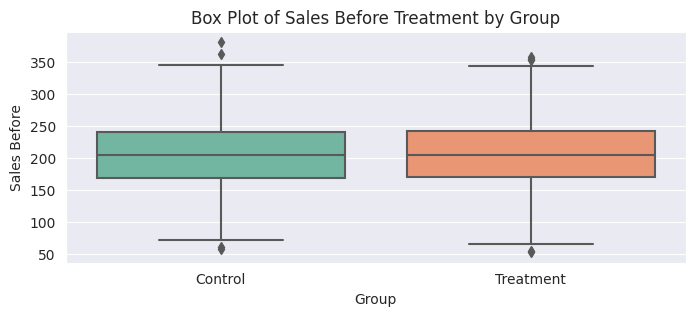

Control Group Normality: W=0.9978, p-value=0.7610
Treatment Group Normality: W=0.9973, p-value=0.5947

Checking for Equal Variances...
Levene's Test for Equal Variances: W=0.0024, p-value=0.9613

Performing the Two-Sample T-Test...
T-Test Result: t-statistic=-0.3620, p-value=0.7175

Significance Level: 0.05
Conclusion: Fail to reject the null hypothesis. There is no significant difference between the means of the Control and Treatment groups.


In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Display the first few rows of the sampled dataset
print("Sampled Dataset Preview:")
print(sampled_data.head())

# Check for normality
print("\nChecking for Normality...")

# Visualize the distribution with box plots
plt.figure(figsize=(8, 3))
sns.set_style('darkgrid')
sns.boxplot(x='Group', y='Sales_Before', data=sampled_data, palette='Set2')
plt.title('Box Plot of Sales Before Treatment by Group')
plt.xlabel('Group')
plt.ylabel('Sales Before')
plt.show()

# Perform Shapiro-Wilk test
control_normality = stats.shapiro(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'])
treatment_normality = stats.shapiro(sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'])
print(f"Control Group Normality: W={control_normality[0]:.4f}, p-value={control_normality[1]:.4f}")
print(f"Treatment Group Normality: W={treatment_normality[0]:.4f}, p-value={treatment_normality[1]:.4f}")

# Check for equal variances
print("\nChecking for Equal Variances...")
levene_test = stats.levene(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'],
                           sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'])
print(f"Levene's Test for Equal Variances: W={levene_test[0]:.4f}, p-value={levene_test[1]:.4f}")

# Perform the Two-Sample T-Test
print("\nPerforming the Two-Sample T-Test...")
ttest_result = stats.ttest_ind(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'],
                               sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'])
print(f"T-Test Result: t-statistic={ttest_result[0]:.4f}, p-value={ttest_result[1]:.4f}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if ttest_result[1] < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Control and Treatment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the means of the Control and Treatment groups.")


In [4]:
# If assumptions are not met, use non-parametric test or Welch's T-Test

# Mann-Whitney U Test (Non-Parametric)
print("\nPerforming Mann-Whitney U Test (if normality assumption not met)...")
mannwhitney_result = stats.mannwhitneyu(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'],
                                       sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'])
print(f"Mann-Whitney U Test Result: U={mannwhitney_result[0]:.4f}, p-value={mannwhitney_result[1]:.4f}")

# Welch's T-Test (Unequal Variances)
print("\nPerforming Welch's T-Test (if equal variance assumption not met)...")
welch_ttest_result = stats.ttest_ind(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'],
                                     sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'], equal_var=False)
print(f"Welch's T-Test Result: t-statistic={welch_ttest_result[0]:.4f}, p-value={welch_ttest_result[1]:.4f}")



Performing Mann-Whitney U Test (if normality assumption not met)...
Mann-Whitney U Test Result: U=123908.0000, p-value=0.8111

Performing Welch's T-Test (if equal variance assumption not met)...
Welch's T-Test Result: t-statistic=-0.3620, p-value=0.7175


# Paired T-Test

The Paired T-Test, also known as the Dependent T-Test, is used to determine whether there is a significant difference between the means of two related groups. This test is widely applied in fields such as psychology, biology, and business where measurements are taken from the same subjects at different times or under different conditions.

## What is the Paired T-Test?

The Paired T-Test compares the means of two related groups to determine if they are statistically significantly different from each other. It assumes that the data follows a normal distribution.

### When to Use the Paired T-Test

- The groups under comparison are related (e.g., the same subjects measured at two time points).
- The data is approximately normally distributed.

## Formulating the Hypotheses

- **Null Hypothesis (H0)**: The mean difference between the paired observations is zero.
- **Alternative Hypothesis (H1)**: The mean difference between the paired observations is not zero.

## Assumptions of the Paired T-Test

1. **Independence**: The differences between the paired observations are independent.
2. **Normality**: The differences between the paired observations should be approximately normally distributed.

## Step-by-Step Guide

### 1. Check for Normality

Use visualizations such as histograms, Q-Q plots, and box plots, and statistical tests like the Shapiro-Wilk test to check if the differences are normally distributed.

### 2. Perform the Paired T-Test

Use the t-test formula:
$$
t = \frac{\bar{d}}{s_d / \sqrt{n}}
$$

where \( \bar{d} \) is the mean of the differences, \( s_d \) is the standard deviation of the differences, and \( n \) is the number of pairs.

### 3. Determine the p-value

The p-value is obtained by comparing the t-statistic to a t-distribution with \( n - 1 \) degrees of freedom.

### 4. Interpret the Results

- **Significance Level (alpha)**: Typically set at 0.05.
- **Decision Rule**: If \( p \leq \alpha \), reject the null hypothesis.

## Example: Paired T-Test

We will use the `Sales_Before` and `Sales_After` variables from our dataset to perform the Paired T-Test.

### Dataset

- **Sales_Before**: Represents the sales before a treatment or intervention.
- **Sales_After**: Represents the sales after a treatment or intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The mean difference between `Sales_Before` and `Sales_After` is zero.
- **Alternative Hypothesis (H1)**: The mean difference between `Sales_Before` and `Sales_After` is not zero.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Perform the Paired T-Test**: Calculate the t-statistic and p-value.
3. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **T-Statistic**: Indicates the magnitude of difference between the means of the paired groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Degrees of Freedom**: Calculated as the number of pairs minus one.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the paired groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.

## What to Do When Assumptions Are Not Met

If the assumptions of the Paired T-Test are not met:

1. **Non-Normal Data**: Use a non-parametric test such as the Wilcoxon Signed-Rank Test which does not assume normality.
2. **Non-Independence**: Consider using other appropriate methods for dependent samples.



Sampled Dataset Preview:
          Group Customer_Segment  Sales_Before  Sales_After  \
6252    Control        Low Value    202.937510   245.562529   
4684  Treatment     Medium Value    124.808089   205.601701   
1731    Control     Medium Value    113.990458   133.337069   
4742  Treatment       High Value    261.604426   419.422090   
4521    Control        Low Value    130.677272   160.140266   

      Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
6252                     69.112754                    76.000000           Yes  
4684                     52.890804                    69.813121           Yes  
1731                     69.575004                    60.940449            No  
4742                     82.913483                   100.000000           Yes  
4521                     62.189051                    67.945571           Yes  

Checking for Normality of Differences...


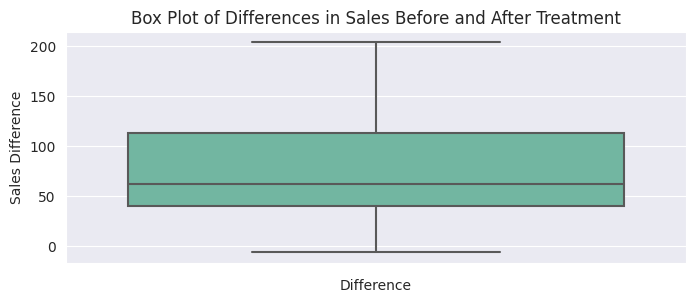

Normality Test for Differences: W=0.9236, p-value=0.0000

Performing Wilcoxon Signed-Rank Test (normality assumption not met)...
Wilcoxon Signed-Rank Test Result: W=2.0000, p-value=0.0000

Significance Level: 0.05
Conclusion: Reject the null hypothesis. There is a significant difference between Sales Before and After the treatment.


In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Display the first few rows of the sampled dataset
print("Sampled Dataset Preview:")
print(sampled_data.head())

# Calculate the differences
sampled_data['Difference'] = sampled_data['Sales_After'] - sampled_data['Sales_Before']

# Check for normality
print("\nChecking for Normality of Differences...")

# Visualize the distribution with box plots
plt.figure(figsize=(8, 3))
sns.boxplot(y='Difference', data=sampled_data, palette='Set2')
plt.title('Box Plot of Differences in Sales Before and After Treatment')
plt.xlabel('Difference')
plt.ylabel('Sales Difference')
plt.show()

# Perform Shapiro-Wilk test
normality_test = stats.shapiro(sampled_data['Difference'])
print(f"Normality Test for Differences: W={normality_test[0]:.4f}, p-value={normality_test[1]:.4f}")

# If normality assumption is met, perform the Paired T-Test
if normality_test[1] >= alpha:
    print("\nPerforming the Paired T-Test...")
    ttest_result = stats.ttest_rel(sampled_data['Sales_Before'], sampled_data['Sales_After'])
    print(f"Paired T-Test Result: t-statistic={ttest_result[0]:.4f}, p-value={ttest_result[1]:.4f}")

    # Interpret the results
    print(f"\nSignificance Level: {alpha}")
    if ttest_result[1] < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant difference between Sales Before and After the treatment.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between Sales Before and After the treatment.")
else:
    # Perform Wilcoxon Signed-Rank Test (Non-Parametric) if normality assumption not met
    print("\nPerforming Wilcoxon Signed-Rank Test (normality assumption not met)...")
    wilcoxon_result = stats.wilcoxon(sampled_data['Sales_Before'], sampled_data['Sales_After'])
    print(f"Wilcoxon Signed-Rank Test Result: W={wilcoxon_result[0]:.4f}, p-value={wilcoxon_result[1]:.4f}")

    # Interpret the results
    print(f"\nSignificance Level: {alpha}")
    if wilcoxon_result[1] < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant difference between Sales Before and After the treatment.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between Sales Before and After the treatment.")


# ANOVA (Analysis of Variance)

ANOVA (Analysis of Variance) is used to determine whether there are any statistically significant differences between the means of three or more independent groups. It is widely used in fields such as psychology, biology, and business to compare group means.

## What is ANOVA?

ANOVA tests the null hypothesis that the means of several groups are equal. It assumes that the data follows a normal distribution and that the variances of the groups are equal (homogeneity of variance).

### When to Use ANOVA

- Comparing the means of three or more independent groups.
- The data is approximately normally distributed.
- The variances of the groups are equal (or nearly equal).

## Formulating the Hypotheses

- **Null Hypothesis (H0)**: The means of the groups are equal.
- **Alternative Hypothesis (H1)**: At least one group mean is different.

## Assumptions of ANOVA

1. **Independence**: The samples are independent of each other.
2. **Normality**: The data in each group should be approximately normally distributed.
3. **Homogeneity of Variance**: The variances of the groups are equal.

## Step-by-Step Guide

### 1. Check for Normality

Use visualizations such as histograms, Q-Q plots, and box plots, and statistical tests like the Shapiro-Wilk test to check if the data is normally distributed.

### 2. Check for Equal Variances

Use Levene's test or Bartlett's test to check if the variances of the groups are equal.

### 3. Perform ANOVA

Use the ANOVA formula:
$$
F = \frac{\text{between-group variability}}{\text{within-group variability}}
$$

### 4. Determine the p-value

The p-value is obtained by comparing the F-statistic to an F-distribution with the appropriate degrees of freedom.

### 5. Interpret the Results

- **Significance Level (alpha)**: Typically set at 0.05.
- **Decision Rule**: If \( p \leq \alpha \), reject the null hypothesis.

## Example: ANOVA

We will use the `Customer_Satisfaction_Before` variable from our dataset to perform ANOVA across `Customer_Segment` groups.

### Dataset

- **Customer_Segment**: Represents different customer segments (`Low Value`, `Medium Value`, `High Value`).
- **Customer_Satisfaction_Before**: Represents customer satisfaction scores before an intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The mean `Customer_Satisfaction_Before` across `Customer_Segment` groups is equal.
- **Alternative Hypothesis (H1)**: At least one group mean is different.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Check for Equal Variances**: Use Levene's test.
3. **Perform ANOVA**: Calculate the F-statistic and p-value.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **F-Statistic**: Indicates the ratio of between-group variability to within-group variability.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the group means. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.

## What to Do When Assumptions Are Not Met

If the assumptions of ANOVA are not met:

1. **Non-Normal Data**: Use a non-parametric test such as the Kruskal-Wallis H Test which does not assume normality.
2. **Unequal Variances**: Use Welch's ANOVA which adjusts for unequal variances.


Sampled Dataset Preview:
          Group Customer_Segment  Sales_Before  Sales_After  \
6252    Control        Low Value    202.937510   245.562529   
4684  Treatment     Medium Value    124.808089   205.601701   
1731    Control     Medium Value    113.990458   133.337069   
4742  Treatment       High Value    261.604426   419.422090   
4521    Control        Low Value    130.677272   160.140266   

      Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
6252                     69.112754                    76.000000           Yes  
4684                     52.890804                    69.813121           Yes  
1731                     69.575004                    60.940449            No  
4742                     82.913483                   100.000000           Yes  
4521                     62.189051                    67.945571           Yes  

Checking for Normality...


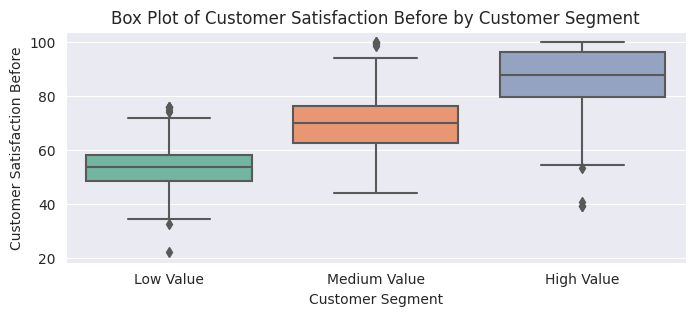

Normality Test for Low Value Segment: W=0.9923, p-value=0.0890
Normality Test for Medium Value Segment: W=0.9921, p-value=0.0746
Normality Test for High Value Segment: W=0.9144, p-value=0.0000

Checking for Equal Variances...
Levene's Test for Equal Variances: W=22.4802, p-value=0.0000

Assumptions not met, performing non-parametric tests...

Performing Kruskal-Wallis H Test (if normality assumption not met)...
Kruskal-Wallis H Test Result: H=648.6686, p-value=0.0000
Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments (Kruskal-Wallis H Test).

Performing Welch's ANOVA (if equal variance assumption not met)...
Welch's ANOVA Result: t-statistic=-21.5198, p-value=0.0000
Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments (Welch's ANOVA).


In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')


# Replace inf values with NaN and drop rows with NaN values in 'Customer_Segment' and 'Customer_Satisfaction_Before'
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
data.dropna(subset=['Customer_Segment', 'Customer_Satisfaction_Before'], inplace=True)

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Display the first few rows of the sampled dataset
print("Sampled Dataset Preview:")
print(sampled_data.head())

# Check for normality
print("\nChecking for Normality...")

# Visualize the distribution with box plots
plt.figure(figsize=(8, 3))
sns.boxplot(x='Customer_Segment', y='Customer_Satisfaction_Before', data=sampled_data, palette='Set2')
plt.title('Box Plot of Customer Satisfaction Before by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Satisfaction Before')
plt.show()

# Perform Shapiro-Wilk test for each group
segments = sampled_data['Customer_Segment'].unique()
normality_passed = True
for segment in segments:
    segment_data = sampled_data[sampled_data['Customer_Segment'] == segment]['Customer_Satisfaction_Before']
    w, p_value = stats.shapiro(segment_data)
    print(f"Normality Test for {segment} Segment: W={w:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        normality_passed = False

# Check for equal variances
print("\nChecking for Equal Variances...")
levene_test = stats.levene(
    sampled_data[sampled_data['Customer_Segment'] == 'Low Value']['Customer_Satisfaction_Before'],
    sampled_data[sampled_data['Customer_Segment'] == 'Medium Value']['Customer_Satisfaction_Before'],
    sampled_data[sampled_data['Customer_Segment'] == 'High Value']['Customer_Satisfaction_Before']
)
print(f"Levene's Test for Equal Variances: W={levene_test[0]:.4f}, p-value={levene_test[1]:.4f}")
equal_variances = levene_test[1] >= 0.05

# Perform ANOVA if assumptions are met, otherwise perform non-parametric tests
alpha = 0.05
if normality_passed and equal_variances:
    print("\nPerforming ANOVA...")
    model = ols('Customer_Satisfaction_Before ~ C(Customer_Segment)', data=sampled_data).fit()
    anova_results = anova_lm(model)
    print(anova_results)

    # Interpret the results
    p_value = anova_results['PR(>F)'][0]
    print(f"\nSignificance Level: {alpha}")
    if p_value < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the means of the Customer Segments.")
else:
    print("\nAssumptions not met, performing non-parametric tests...")
    
    # Kruskal-Wallis H Test (Non-Parametric)
    print("\nPerforming Kruskal-Wallis H Test (if normality assumption not met)...")
    kruskal_result = stats.kruskal(
        sampled_data[sampled_data['Customer_Segment'] == 'Low Value']['Customer_Satisfaction_Before'],
        sampled_data[sampled_data['Customer_Segment'] == 'Medium Value']['Customer_Satisfaction_Before'],
        sampled_data[sampled_data['Customer_Segment'] == 'High Value']['Customer_Satisfaction_Before']
    )
    print(f"Kruskal-Wallis H Test Result: H={kruskal_result[0]:.4f}, p-value={kruskal_result[1]:.4f}")

    # Interpret the results of Kruskal-Wallis H Test
    if kruskal_result[1] < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments (Kruskal-Wallis H Test).")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the means of the Customer Segments (Kruskal-Wallis H Test).")

    # Welch's ANOVA (Unequal Variances)
    print("\nPerforming Welch's ANOVA (if equal variance assumption not met)...")
    welch_anova_results = stats.ttest_ind(
        sampled_data[sampled_data['Customer_Segment'] == 'Low Value']['Customer_Satisfaction_Before'],
        sampled_data[sampled_data['Customer_Segment'] == 'Medium Value']['Customer_Satisfaction_Before'],
        equal_var=False
    )
    print(f"Welch's ANOVA Result: t-statistic={welch_anova_results[0]:.4f}, p-value={welch_anova_results[1]:.4f}")

    # Interpret the results of Welch's ANOVA
    if welch_anova_results[1] < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments (Welch's ANOVA).")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the means of the Customer Segments (Welch's ANOVA).")


# Correlation Test

Correlation analysis is used to measure the strength and direction of the relationship between two continuous variables. It helps to understand whether and how strongly pairs of variables are related.

## What is a Correlation Test?

A correlation test quantifies the degree to which two variables are related. The most common correlation coefficients are the Pearson correlation coefficient, which measures linear correlation, and the Spearman rank correlation coefficient, which measures monotonic relationships.

### When to Use a Correlation Test

- When you want to measure the strength and direction of the relationship between two continuous variables.
- When the data is approximately normally distributed (for Pearson correlation).

## Formulating the Hypotheses

- **Null Hypothesis (H0)**: There is no correlation between the two variables.
- **Alternative Hypothesis (H1)**: There is a significant correlation between the two variables.

## Types of Correlation Tests

1. **Pearson Correlation**: Measures the linear relationship between two continuous variables.
2. **Spearman Rank Correlation**: Measures the monotonic relationship between two variables, and is used when the data does not meet the assumptions of the Pearson correlation.

## Assumptions of Pearson Correlation

1. **Linearity**: The relationship between the two variables is linear.
2. **Normality**: The variables are approximately normally distributed.
3. **Homoscedasticity**: The variance of one variable is constant across the levels of the other variable.

## Step-by-Step Guide

### 1. Visualize the Relationship

Use scatter plots to visualize the relationship between the two variables.

### 2. Check for Normality

Use visualizations such as histograms or Q-Q plots, and statistical tests like the Shapiro-Wilk test to check if the data is normally distributed.

### 3. Perform the Correlation Test

- **Pearson Correlation**: If the data is normally distributed and assumptions are met.
- **Spearman Rank Correlation**: If the data is not normally distributed or does not meet the assumptions for Pearson correlation.

## Example: Correlation Test

We will use the `Sales_Before` and `Customer_Satisfaction_Before` variables from our dataset to perform a correlation test.

### Dataset

- **Sales_Before**: Represents sales before a treatment or intervention.
- **Customer_Satisfaction_Before**: Represents customer satisfaction scores before a treatment or intervention.

### Hypothesis

- **Null Hypothesis (H0)**: There is no correlation between `Sales_Before` and `Customer_Satisfaction_Before`.
- **Alternative Hypothesis (H1)**: There is a significant correlation between `Sales_Before` and `Customer_Satisfaction_Before`.

### Steps

1. **Visualize the Relationship**: Use scatter plots.
2. **Check for Normality**: Use visualizations and statistical tests.
3. **Perform the Correlation Test**: Calculate the correlation coefficient and p-value.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **Correlation Coefficient**: Indicates the strength and direction of the relationship between the variables.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant correlation between the two variables. Otherwise, we fail to reject the null hypothesis, indicating no significant correlation.

## What to Do When Assumptions Are Not Met

If the assumptions of Pearson correlation are not met:

1. **Non-Normal Data**: Use the Spearman Rank Correlation.
2. **Non-Linearity**: Transform the data or use non-parametric methods.



Sampled Dataset Preview:
          Group Customer_Segment  Sales_Before  Sales_After  \
6252    Control        Low Value    202.937510   245.562529   
4684  Treatment     Medium Value    124.808089   205.601701   
1731    Control     Medium Value    113.990458   133.337069   
4742  Treatment       High Value    261.604426   419.422090   
4521    Control        Low Value    130.677272   160.140266   

      Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
6252                     69.112754                    76.000000           Yes  
4684                     52.890804                    69.813121           Yes  
1731                     69.575004                    60.940449            No  
4742                     82.913483                   100.000000           Yes  
4521                     62.189051                    67.945571           Yes  


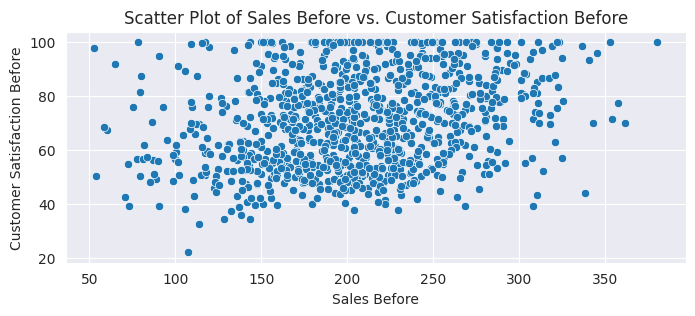


Checking for Normality...
Sales_Before Normality Test: W=0.9983, p-value=0.4559
Customer_Satisfaction_Before Normality Test: W=0.9666, p-value=0.0000

Performing Spearman Rank Correlation Test...
Correlation Coefficient: 0.2561
p-value: 0.0000

Significance Level: 0.05
Conclusion: Reject the null hypothesis. There is a significant correlation between Sales Before and Customer Satisfaction Before.


In [7]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Replace inf values with NaN and drop rows with NaN values in 'Sales_Before' and 'Customer_Satisfaction_Before'
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
data.dropna(subset=['Sales_Before', 'Customer_Satisfaction_Before'], inplace=True)

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Display the first few rows of the sampled dataset
print("Sampled Dataset Preview:")
print(sampled_data.head())

# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 3))
sns.scatterplot(x='Sales_Before', y='Customer_Satisfaction_Before', data=sampled_data)
plt.title('Scatter Plot of Sales Before vs. Customer Satisfaction Before')
plt.xlabel('Sales Before')
plt.ylabel('Customer Satisfaction Before')
plt.show()

# Check for normality
print("\nChecking for Normality...")

# Perform Shapiro-Wilk test
sales_normality = stats.shapiro(sampled_data['Sales_Before'])
satisfaction_normality = stats.shapiro(sampled_data['Customer_Satisfaction_Before'])
print(f"Sales_Before Normality Test: W={sales_normality[0]:.4f}, p-value={sales_normality[1]:.4f}")
print(f"Customer_Satisfaction_Before Normality Test: W={satisfaction_normality[0]:.4f}, p-value={satisfaction_normality[1]:.4f}")

# Perform the appropriate correlation test
if sales_normality[1] >= 0.05 and satisfaction_normality[1] >= 0.05:
    print("\nPerforming Pearson Correlation Test...")
    correlation, p_value = stats.pearsonr(sampled_data['Sales_Before'], sampled_data['Customer_Satisfaction_Before'])
else:
    print("\nPerforming Spearman Rank Correlation Test...")
    correlation, p_value = stats.spearmanr(sampled_data['Sales_Before'], sampled_data['Customer_Satisfaction_Before'])

# Display the results
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant correlation between Sales Before and Customer Satisfaction Before.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant correlation between Sales Before and Customer Satisfaction Before.")


# A/B Testing (Continuous & Boolean Outcomes)

A/B testing is a method used to compare two versions of a variable to determine which one performs better. This technique is widely used in business, marketing, and product development to test changes to web pages, advertisements, or product features. The tests can be performed on both continuous and boolean (binary) outcomes.

## What is A/B Testing?

A/B testing involves randomly assigning subjects into two groups: a control group (A) and a treatment group (B). The performance of each group is measured and compared to determine if the treatment group performs significantly better than the control group.

### Types of Outcomes in A/B Testing

1. **Continuous Outcomes**: The outcome variable is continuous (e.g., sales, revenue, customer satisfaction scores).
2. **Boolean Outcomes**: The outcome variable is binary (e.g., purchase made or not, conversion or no conversion).

## Formulating the Hypotheses

For both continuous and boolean outcomes:
- **Null Hypothesis (H0)**: There is no difference between the control and treatment groups.
- **Alternative Hypothesis (H1)**: There is a difference between the control and treatment groups.

## Assumptions of A/B Testing

1. **Random Assignment**: Subjects are randomly assigned to control and treatment groups.
2. **Independence**: Observations are independent of each other.
3. **Sufficient Sample Size**: The sample size is large enough to detect a meaningful difference.

## Step-by-Step Guide

### A/B Testing with Continuous Outcomes

We will use the `Sales_After` variable from our dataset to compare the `Control` and `Treatment` groups.

### Dataset

- **Group**: Represents two groups in an experiment (`Control`, `Treatment`).
- **Sales_After**: Represents the sales after an intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The mean `Sales_After` of the `Control` and `Treatment` groups are equal.
- **Alternative Hypothesis (H1)**: The mean `Sales_After` of the `Control` and `Treatment` groups are not equal.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Check for Equal Variances**: Use Levene's test.
3. **Perform the Two-Sample T-Test**: Calculate the t-statistic and p-value.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **T-Statistic**: Indicates the magnitude of difference between the means of the two groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the two groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.

### A/B Testing with Boolean Outcomes

We will use the `Purchase_Made` variable from our dataset to compare the `Control` and `Treatment` groups.

### Dataset

- **Group**: Represents two groups in an experiment (`Control`, `Treatment`).
- **Purchase_Made**: Represents whether a purchase was made (`1` for yes, `0` for no).

### Hypothesis

- **Null Hypothesis (H0)**: The proportion of `Purchase_Made` in the `Control` and `Treatment` groups are equal.
- **Alternative Hypothesis (H1)**: The proportion of `Purchase_Made` in the `Control` and `Treatment` groups are not equal.

### Steps

1. **Create a Contingency Table**: Summarize the data in a matrix format.
2. **Perform the Chi-Square Test**: Calculate the chi-square statistic and p-value.
3. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **Chi-Square Statistic**: Indicates the magnitude of difference between the observed and expected frequencies.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the proportions of the two groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.


## A/B Testing with Continuous Outcomes

In [8]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the groups
control_group = sampled_data[sampled_data['Group'] == 'Control']['Sales_After']
treatment_group = sampled_data[sampled_data['Group'] == 'Treatment']['Sales_After']

# Check for normality using Shapiro-Wilk test
stat_control, p_control = stats.shapiro(control_group)
stat_treatment, p_treatment = stats.shapiro(treatment_group)
print("\nNormality Test Results (Shapiro-Wilk):")
print(f"Control Group: W = {stat_control:.4f}, p-value = {p_control:.4f}")
print(f"Treatment Group: W = {stat_treatment:.4f}, p-value = {p_treatment:.4f}")

# Check for equal variances using Levene's test
stat, p = stats.levene(control_group, treatment_group)
print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

# Perform Two-Sample T-Test
t_stat, p_val = stats.ttest_ind(control_group, treatment_group, equal_var=True)

# Display the results
print("\nTwo-Sample T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the mean Sales_After of the Control and Treatment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the mean Sales_After of the Control and Treatment groups.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Normality Test Results (Shapiro-Wilk):
Control Group: W = 0.9980, p-value = 0.8387
Treatment Group: W = 0.9975, p-value = 0.6750

Levene's Test for Equal Varia

## A/B Testing with Boolean Outcomes

In [9]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Create a contingency table
contingency_table = pd.crosstab(sampled_data['Group'], sampled_data['Purchase_Made'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the proportions of Purchase_Made in the Control and Treatment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the proportions of Purchase_Made in the Control and Treatment groups.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Contingency Table:
Purchase_Made   No  Yes
Group                  
Control        248  252
Treatment      237  263

Chi-Square Test Results:
Chi-Square Statist

---
## Thank You for Exploring This Notebook!


If you have any questions, suggestions, or just want to discuss any of the topics further, please don't hesitate to reach out or leave a comment. Your feedback is not only welcome but also invaluable!

Happy analyzing, and stay curious!

---